# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
import pandas as pd 
import numpy as np

In [3]:
# Your code here. 

x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

print(student_data)


    X   Y
0  17  10
1  51   1
2  27   5
3  21   9
4  36   4
5  48   2
6  19   9
7  26   6
8  54   0
9  30   3


Draw a dispersion diagram (scatter plot) for the data.

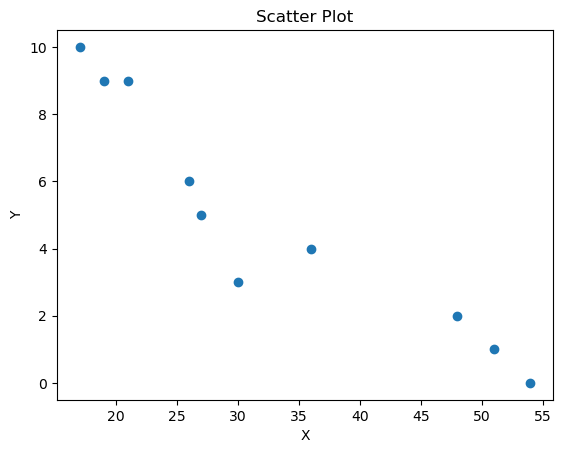

In [4]:
# Your code here.
import matplotlib.pyplot as plt

plt.scatter(x_values, y_values)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')

plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 

#Se podría dibujar una recta decreciente sobre los puntos del scatter plot que indicaría que cuanto menor es la edad, mayor es el número de retrasos.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
covarianza = np.cov(x_values, y_values)[0, 1]

# Calculate correlation
correlacion = np.corrcoef(x_values, y_values)[0, 1]

# Print covariance and correlation
print("Covarianza:", covarianza)
print("Correlacion:", correlacion)

Covarianza: -45.56666666666666
Correlacion: -0.9391626886887122


In [7]:
#La correlación indica que la edad y los retrasos poseen una fuerte correlación, en este caso negativa, por lo que el aumento de una indican la disminución de la otra. Una covarianza de -45 también indicaría una fuerte relación linear negativa en la que la disminución de una variable fortaleceria el aumento de la otra.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
from sklearn.linear_model import LinearRegression

#Convierte x_values a un np array y lo reforma
x_values_arr = np.array(x_values).reshape(-1, 1)

#Crea modelo de regresión lineal
model = LinearRegression()

#Entrena el modelo
model.fit(x_values_arr, y_values)

#Predice los valores para x_values
y_pred = model.predict(x_values_arr)




Plot your regression model on your scatter plot.

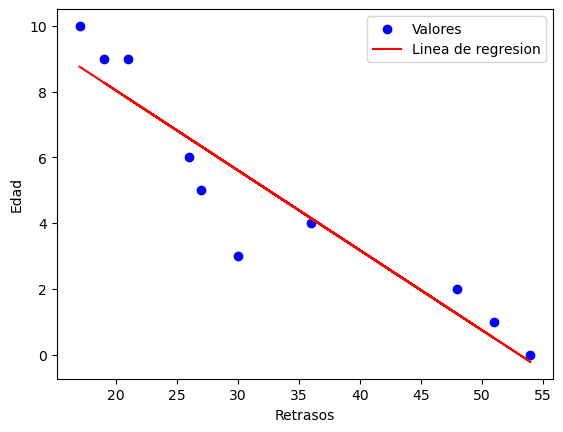

In [9]:
# Your code here.
#Scatter plot
plt.scatter(x_values, y_values, color='b', label='Valores')

#Linea de regresion
plt.plot(x_values, y_pred, color='r', label='Linea de regresion')


plt.xlabel('Retrasos')
plt.ylabel('Edad')
plt.legend()

plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
# Your response here. 
#El modelo predice un conjunto de valores muy similares a los del dataframe original en el que como se ha comentado existe una fuerte relación lineal negativa que aumenta el número de retrasos a medida que la edad decrece.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
coches=pd.read_csv('vehicles.csv')
coches.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

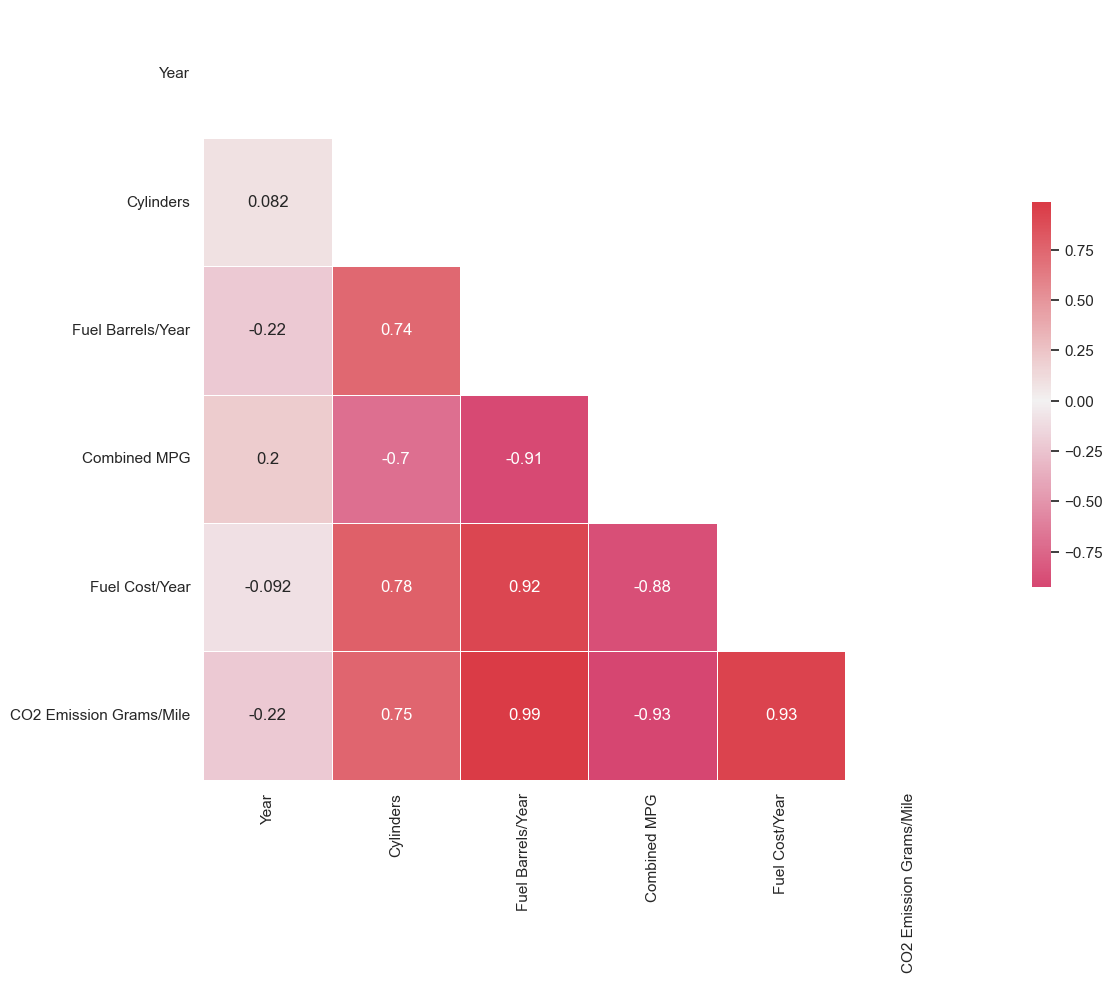

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = coches[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

plt.figure(figsize=(15, 10))
sns.set(style='white')

mask = np.triu(np.ones_like(subset.corr(), dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(subset.corr(),
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()



In [13]:
#Fuel Barrels/Year seria la columna con una correlación mas alta respecto a las emisiones así como el año sería la columna con la correlación mas baja.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Your response here. 
import statsmodels.api as sm

# Esplitea el dataframe
X = sm.add_constant(coches[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']])
y = coches['CO2 Emission Grams/Mile']

# Crea el modelo OLS y entrena
modelo = sm.OLS(y, X).fit()

# Predice el modelo
pred=modelo.predict(X)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [15]:
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                             16:57:05   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Igual que en el ejercicio de clase, el valor más importante es el año, ya que es el valor mas cercano a 1 en su coeficiente.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [17]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [18]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [19]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [20]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [21]:
# Your response here. 